LDA, QDA, NB on wine dataset

In [1]:
# importing libraries
import numpy as np
import requests
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import urllib
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

read dataset 

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

data = pd.read_csv(
    url,
    sep=',',
    encoding='utf-8',
    names = ['alcohol','malic_acid','ash','alcalinity','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','code','proline']
)
LDA

compare LDA, QDA, NB on full dataset

In [3]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
nb = GaussianNB()

In [4]:
# build extended confusion matrix 

def CM_large(x, y):   
    cm = pd.crosstab(x, y)
    print(cm)
    FP = cm.sum(axis = 0)  - np.diag(cm)
    FN = cm.sum(axis = 1)  - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum().sum() - (FP + FN + TP)


    TPR = TP/(TP+FN) #recall, sensitivity
    TNR = TN/(FP+TN) #specifity, selectivity
    
    PPV = TP/(TP+FP) #precision
    NPV = TN/(TN+FN)

    FPR = FP/(FP+TN)
    ACC = (TP+TN)/(TP+FP+FN+TN)


    return np.mean(ACC), np.mean(FPR), np.mean(TPR), np.mean(PPV), np.mean(NPV)


In [5]:
def params_display(M):
    for clf in [lda, qda, nb]:
        clf.fit(data.iloc[:, 0:M], data.index)
        
    preds = pd.DataFrame(np.array([clf.predict(data.iloc[:, 0:M]) for clf in [lda, qda, nb]]).T)
    preds.columns = ["lda", "qda", "nb"]
    res = pd.DataFrame([CM_large(data.index, preds[i]) for i in preds.columns])

    res.index = preds.columns
    res.columns = ["acc", "fpr", "tpr", "ppv", "npv"]
    res.columns.name = str(M) + ' columns'
    display(res.sort_values('acc', ascending=False))

In [6]:
params_display(13)

lda     1   2   3
row_0            
1      59   0   0
2       0  71   0
3       0   0  48
qda     1   2   3
row_0            
1      59   0   0
2       1  70   0
3       0   0  48
nb      1   2   3
row_0            
1      58   1   0
2       0  70   1
3       0   0  48


13 columns,acc,fpr,tpr,ppv,npv
lda,1.000000,0.000000,1.000000,1.000000,1.000000
qda,0.996255,0.002801,0.995305,0.994444,0.996914
nb,0.992509,0.005679,0.989655,0.988502,0.994107


compare LDA, QDA, NB for 2/5/10 first cols

In [7]:
params_display(2)

lda     1   2   3
row_0            
1      51   1   7
2       5  61   5
3       7   9  32
qda     1   2   3
row_0            
1      52   1   6
2       4  62   5
3       7  10  31
nb      1   2   3
row_0            
1      51   1   7
2       4  62   5
3       7  10  31


2 columns,acc,fpr,tpr,ppv,npv
qda,0.876404,0.093285,0.800143,0.804269,0.909472
lda,0.872659,0.095535,0.796743,0.798650,0.905858
nb,0.872659,0.095849,0.794493,0.797609,0.906465


In [8]:
params_display(5)

lda     1   2   3
row_0            
1      54   1   4
2       1  65   5
3       3   8  37
qda     1   2   3
row_0            
1      53   1   5
2       1  65   5
3       2   6  40
nb      1   2   3
row_0            
1      52   3   4
2       2  62   7
3       3   7  38


5 columns,acc,fpr,tpr,ppv,npv
qda,0.925094,0.055851,0.882377,0.883069,0.943905
lda,0.917603,0.062319,0.867194,0.871254,0.939103
nb,0.902622,0.073363,0.848754,0.849634,0.926575


In [9]:
params_display(10)

lda     1   2   3
row_0            
1      59   0   0
2       1  70   0
3       0   1  47
qda     1   2   3
row_0            
1      59   0   0
2       1  70   0
3       0   0  48
nb      1   2   3
row_0            
1      56   3   0
2       2  68   1
3       0   1  47


10 columns,acc,fpr,tpr,ppv,npv
qda,0.996255,0.002801,0.995305,0.994444,0.996914
lda,0.992509,0.005916,0.988361,0.989750,0.994340
nb,0.973783,0.020627,0.962022,0.963043,0.979669


create train (50%), validation (25%), test (25%) dataset for 2 cols

In [12]:
data.klasa=data.index
# (50% train, 50% rest)
x_train, x_rest, y_train, y_rest = train_test_split(data.iloc[:,:2], data.klasa, test_size=0.5, stratify=data.klasa)

# (50% test, 50% val)
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=0.5, stratify=y_rest)

# Sprawdzenie rozmiarów zbiorów
print("Rozmiary zbiorów:")
print("Train:", len(x_train))
print("Val:", len(x_val))
print("Test:", len(x_test))

Rozmiary zbiorów:
Train: 89
Val: 45
Test: 44


In [13]:
for clf in [lda, qda, nb]:
    clf.fit(x_train, y_train)

In [14]:
preds = pd.DataFrame(np.array([clf.predict(x_train) for clf in [lda, qda, nb]]).T)
preds.columns = ["lda", "qda", "nb"] 
for i in preds.columns:
    print(metrics.classification_report(y_train, preds[i]))

              precision    recall  f1-score   support

           1       0.80      0.83      0.81        29
           2       0.76      0.81      0.78        36
           3       0.71      0.62      0.67        24

    accuracy                           0.76        89
   macro avg       0.76      0.75      0.75        89
weighted avg       0.76      0.76      0.76        89

              precision    recall  f1-score   support

           1       0.81      0.90      0.85        29
           2       0.77      0.83      0.80        36
           3       0.78      0.58      0.67        24

    accuracy                           0.79        89
   macro avg       0.79      0.77      0.77        89
weighted avg       0.79      0.79      0.78        89

              precision    recall  f1-score   support

           1       0.81      0.86      0.83        29
           2       0.79      0.83      0.81        36
           3       0.75      0.62      0.68        24

    accuracy        

In [15]:
preds = pd.DataFrame(np.array([clf.predict(x_val) for clf in [lda, qda, nb]]).T)
preds.columns = ["lda", "qda", "nb"] 
for i in preds.columns:
    print(i)
    print(metrics.classification_report(y_val, preds[i]))

lda
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        15
           2       0.76      0.89      0.82        18
           3       0.70      0.58      0.64        12

    accuracy                           0.76        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.75      0.76      0.75        45

qda
              precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       0.84      0.89      0.86        18
           3       0.62      0.67      0.64        12

    accuracy                           0.78        45
   macro avg       0.77      0.76      0.76        45
weighted avg       0.78      0.78      0.78        45

nb
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        15
           2       0.89      0.89      0.89        18
           3       0.62      0.67      0.64        12

    accur

LDA is my choice - I create results for test group

In [16]:
print(metrics.classification_report(y_test, lda.predict(x_test)))

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.88      0.88      0.88        17
           3       0.80      0.67      0.73        12

    accuracy                           0.82        44
   macro avg       0.82      0.81      0.81        44
weighted avg       0.82      0.82      0.82        44



In [19]:
kf = KFold(n_splits = 10)

for train, test in kf.split(data[["alcohol","malic_acid"]]):
    print(test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
[36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53]
[54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
[72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
[108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
[126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
[144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160]
[161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]


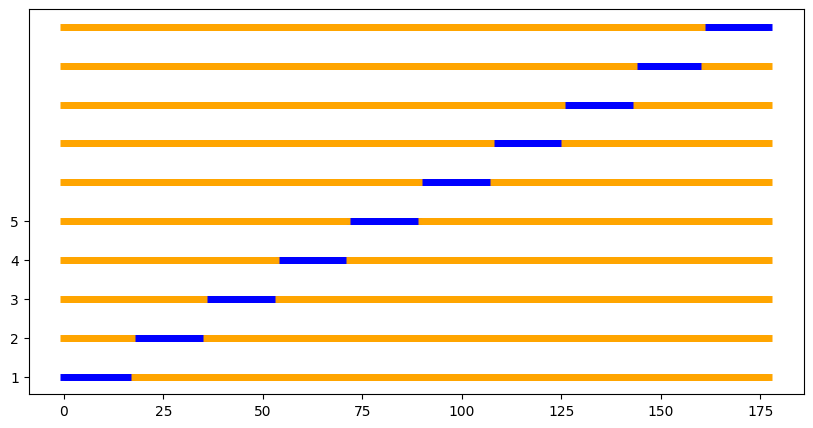

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

for i, (train, test) in enumerate(kf.split(data[["alcohol","malic_acid"]])):
    ax.scatter(test, np.tile(i, len(test)), color = "blue", marker = "_", lw = 5)
    ax.scatter(train, np.tile(i, len(train)), color = "orange", marker = "_", lw = 5)

ax.set(yticks=np.arange(5),yticklabels=np.arange(1,6));

plt.show()

In [22]:
cvs = cross_val_score(lda, data[["alcohol","malic_acid"]], data.klasa, cv = kf)
print(cvs)
print(round(cvs.mean(),2))

[0.88888889 0.77777778 0.55555556 0.77777778 0.72222222 1.
 0.77777778 0.72222222 0.47058824 0.52941176]
0.72


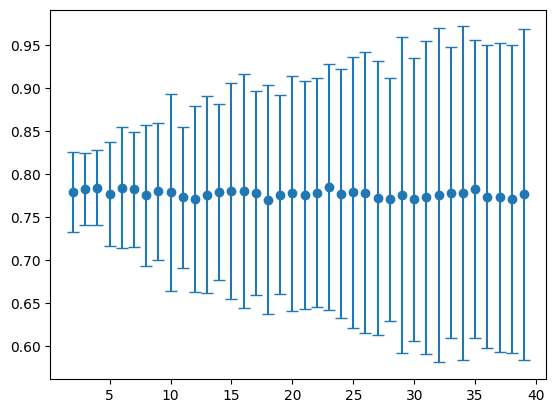

In [23]:
def test(clf, data, m, n):
    kf = RepeatedKFold(n_repeats = m, n_splits = n)
    score = cross_val_score(clf, data[["alcohol","malic_acid"]], data.klasa, cv = kf)
    return score.mean(), score.std()
    
z = np.array([test(lda, data, 5, i) for i in range(2, 40)])

plt.errorbar(range(2,40), z[:,0], yerr = z[:,1], fmt="o", capsize=4)

plt.show()